<a href="https://colab.research.google.com/github/Vaish-mambady/Stock-Prices-Anomaly-Detection/blob/main/MiniProject_5_Stock_Prices_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Mini Project-5: Stock Prices Anomaly Detection

## Trainer: PRASHANTH KANNADAGULI

## Learning Objectives

At the end of the experiment, you will be able to :

* apply PCA based analysis on various stocks data
* analyze and create time series data
* implement LSTM auto-encoders
* detect the anomalies based on the loss


## Information

Autoencoder Neural Networks try to learn data representation of its input. Usually, we want to learn an efficient encoding that uses fewer parameters/memory. The encoding should allow for output similar to the original input. In a sense, we’re forcing the model to learn the most important features of the data using as few parameters as possible.

LSTM autoencoder is an encoder that makes use of LSTM encoder-decoder architecture to compress data using an encoder and decode it to retain original structure using a decoder.

**Anomaly Detection**

Anomaly detection refers to the task of finding/identifying rare events/data points. Some applications include - bank fraud detection, tumor detection in medical imaging, and errors in written text.

A lot of supervised and unsupervised approaches for anomaly detection have been proposed. Some of the approaches include - One-class SVMs, Bayesian Networks, Cluster analysis, and Neural Networks.

We will use an LSTM Autoencoder Neural Network to detect/predict anomalies (sudden price changes) in the S&P 500 index.

## Dataset



This mini-project consists of two parts and two different stock price datasets:

### PART A

Using the **S&P 500 stock prices data of different companies**, we will perform a PCA based analysis.

### PART B

Using the **S&P 500 stock price index time series data**, we will perform anomaly detection in the stock prices across the years. The dataset chosen is is S&P500 Daily Index a .csv format with one column with a daily timestamp and the second column with the raw, un-adjusted closing prices for each day. This long term, granular time series dataset allows researchers to have a good sized publicly available financial dataset to explore time series trends or use as part of a quantitative finance project.

## Problem Statement

Detect the stock price anomalies by implementing an LSTM autoencoder

## Grading = 20 Points

In [ ]:
# Download dataset from
# https://cdn.iisc.talentsprint.com/CDS/MiniProjects/SPY.csv
# https://cdn.iisc.talentsprint.com/CDS/MiniProjects/prices.csv

# Downloading datasets
!wget -O SPY.csv https://cdn.iisc.talentsprint.com/CDS/MiniProjects/SPY.csv
!wget -O prices.csv https://cdn.iisc.talentsprint.com/CDS/MiniProjects/prices.csv

# Verify download
import os
print("Downloaded files:", os.listdir())



--2025-05-13 10:25:03--  https://cdn.iisc.talentsprint.com/CDS/MiniProjects/SPY.csv
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 707303 (691K) [application/octet-stream]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 690.73K   644KB/s    in 1.1s    

2025-05-13 10:25:05 (644 KB/s) - ‘SPY.csv’ saved [707303/707303]

--2025-05-13 10:25:05--  https://cdn.iisc.talentsprint.com/CDS/MiniProjects/prices.csv
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3570380 (3.4M) [application/octet-stream]
Saving to: ‘prices.csv’

prices.csv          100%[===================>]   3.40M  2.02MB/s    in 1.7

### Import required packages

In [ ]:
import keras
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import LSTM, RepeatVector, TimeDistributed
from keras.layers import BatchNormalization
from keras.models import Sequential, Model
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## PCA Analysis (PART-A)

Principal Component Analysis (PCA) decomposes the data into many vectors called principal components. These summaries are linear combinations of the input features that try to explain as much variance in the data as possible. By convention, these principal components are ordered by the amount of variance they can explain, with the first principal component explaining most of the data.

Perform PCA based analytics on the stock prices data from different companies.

Hint: Refer to the article [here](https://towardsdatascience.com/stock-market-analytics-with-pca-d1c2318e3f0e).

### Load and pre-process the prices data (2 points)

In [ ]:
# Load the prices dataset
prices_df = pd.read_csv('prices.csv')

# Show basic information
print("Shape of the dataset:", prices_df.shape)
print("Columns:", prices_df.columns.tolist())
prices_df.head()


Shape of the dataset: (394, 503)
Columns: ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', '

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85.017082,28.982893,157.171890,74.207466,81.950539,82.938141,168.809998,84.622925,204.910950,334.429993,...,59.934875,100.115349,63.633118,56.203197,78.396255,99.349007,147.579269,259.140015,49.903751,132.803421
2,83.652077,27.548195,157.181747,73.486023,81.172668,81.895088,166.820007,83.591301,204.569687,331.809998,...,60.223114,97.810677,63.121540,55.581242,78.857689,99.037834,147.193512,256.049988,49.199547,132.823227
3,83.899353,27.219410,154.598541,74.071579,81.813271,83.094116,179.039993,84.029251,203.233841,333.709991,...,60.136642,95.771927,63.606186,55.887280,78.347168,98.979500,146.342834,258.010010,48.600010,131.803482
4,84.156532,27.119778,152.764648,73.723213,81.346550,82.499466,180.350006,83.562103,198.846008,333.390015,...,60.011738,97.958405,63.085632,56.183449,78.052628,99.154533,146.214264,256.470001,48.305000,132.248978


### Apply PCA

* plot the explained variance ratio. Hint: `pca.explained_variance_ratio_`
* Represent the components which preserve maximum information and plot to visualize
* Compute the daily returns of the 500 company stocks. Hint: See the following [reference](https://towardsdatascience.com/stock-market-analytics-with-pca-d1c2318e3f0e).
* Plot the stocks with most negative and least negative PCA weights in the pandemic period (Year 2020). Use reference as above. Discuss the least and most impacted industrial sectors in terms of stocks.

In [ ]:

# First, let's check if the first row is just NaN values (which we don't need)
# Drop the first row if it contains all NaNs (assumed to be invalid data)
prices_df = prices_df.dropna(how='all', axis=0)

# Now, fill any remaining missing values in the dataset (if applicable)
prices_df.fillna(method='ffill', inplace=True)

# After cleaning, check the first few rows again
print(prices_df.head())


           A        AAL         AAP       AAPL       ABBV        ABC  \
1  85.017082  28.982893  157.171890  74.207466  81.950539  82.938141   
2  83.652077  27.548195  157.181747  73.486023  81.172668  81.895088   
3  83.899353  27.219410  154.598541  74.071579  81.813271  83.094116   
4  84.156532  27.119778  152.764648  73.723213  81.346550  82.499466   
5  84.987411  27.737495  151.009644  74.909149  81.923080  83.298828   

         ABMD        ABT         ACN        ADBE  ...        XEL        XLNX  \
1  168.809998  84.622925  204.910950  334.429993  ...  59.934875  100.115349   
2  166.820007  83.591301  204.569687  331.809998  ...  60.223114   97.810677   
3  179.039993  84.029251  203.233841  333.709991  ...  60.136642   95.771927   
4  180.350006  83.562103  198.846008  333.390015  ...  60.011738   97.958405   
5  178.690002  83.902740  199.236069  337.869995  ...  59.954086   97.682640   

         XOM       XRAY        XYL        YUM         ZBH        ZBRA  \
1  63.633118 

<ipython-input-26-b6b45fdffd50>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices_df.fillna(method='ffill', inplace=True)


<ipython-input-31-aef39ebf6fb5>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices_df.fillna(method='ffill', inplace=True)


Daily returns shape: (48, 503)


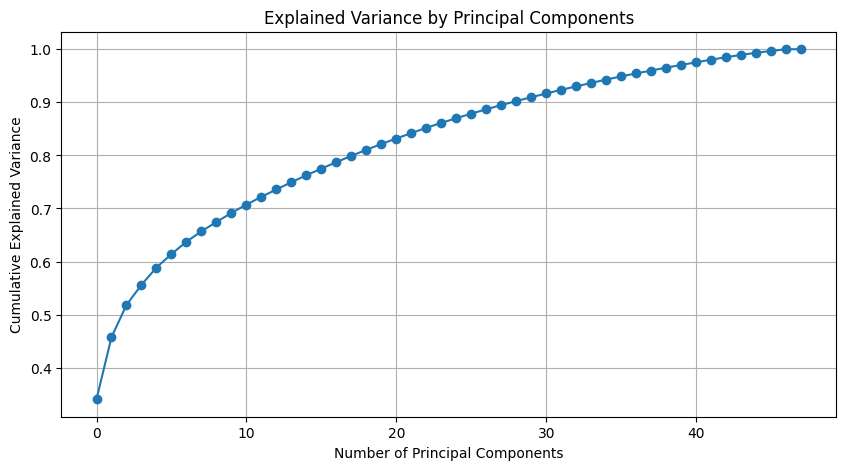

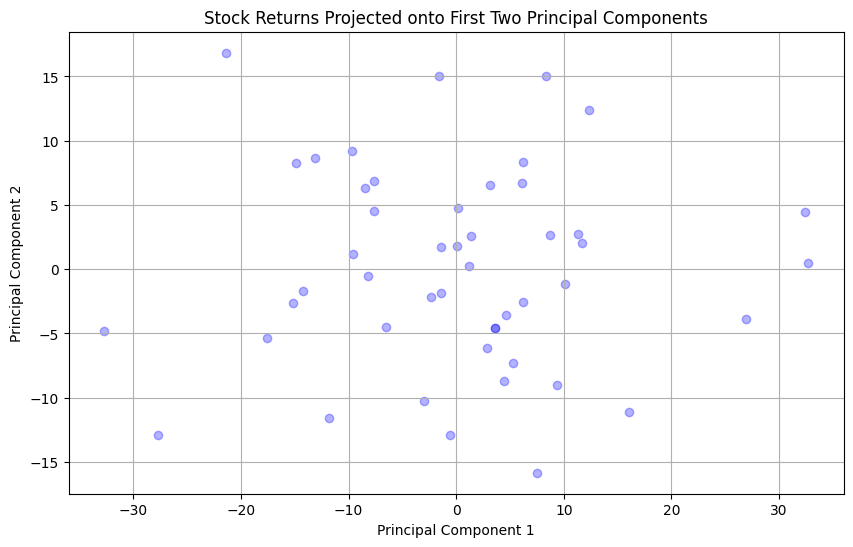

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop date column if present
if 'date' in prices_df.columns:
    prices_df = prices_df.drop('date', axis=1)

# Fill any missing values with the previous available value
prices_df.fillna(method='ffill', inplace=True)

# Compute daily returns (percentage change)
daily_returns = prices_df.pct_change().dropna()

# Standardize the returns before PCA
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(daily_returns)

print("Daily returns shape:", daily_returns.shape)

# Apply PCA
pca = PCA()
pca.fit(scaled_returns)

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Project data onto first two principal components
projected = pca.transform(scaled_returns)

plt.figure(figsize=(10, 6))
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.3, c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Stock Returns Projected onto First Two Principal Components')
plt.grid(True)
plt.show()


#### Apply T-SNE and visualize with a graph (2 points)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


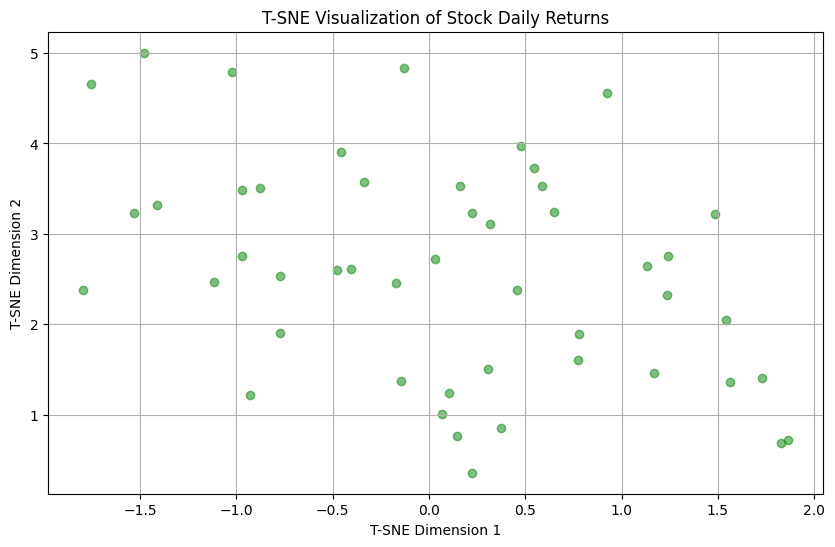

In [ ]:
from sklearn.manifold import TSNE

# Apply T-SNE to scaled returns
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(scaled_returns)

# Plot the T-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5, c='green')
plt.title('T-SNE Visualization of Stock Daily Returns')
plt.xlabel('T-SNE Dimension 1')
plt.ylabel('T-SNE Dimension 2')
plt.grid(True)
plt.show()



## Anomaly Detection (PART-B)

### Load and Preprocess the data

* Inspect the S&P 500 Index Data

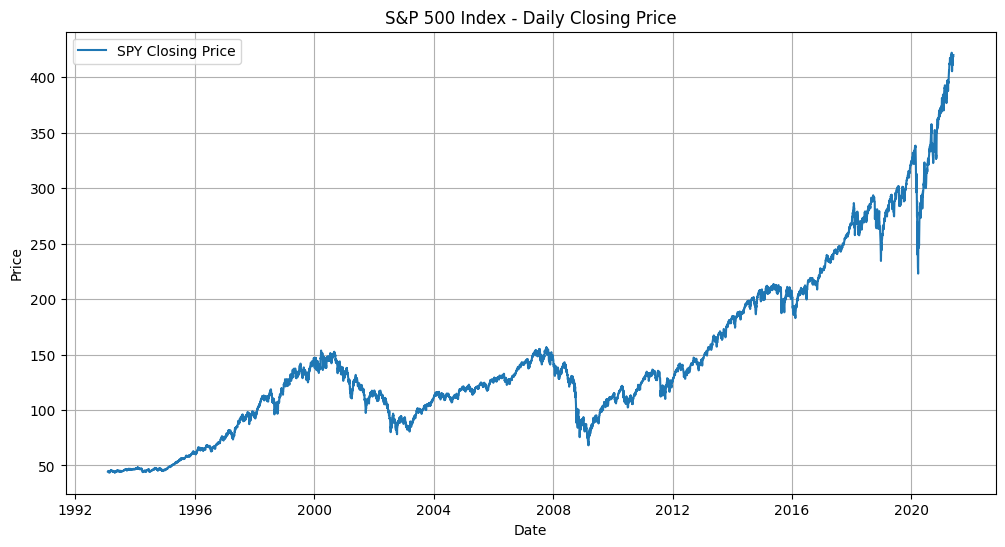

In [ ]:
# Load SPY index time series data
spy_df = pd.read_csv('SPY.csv')

# Parse date and set as index
spy_df['Date'] = pd.to_datetime(spy_df['Date'])
spy_df.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(spy_df['Close'], label='SPY Closing Price')
plt.title('S&P 500 Index - Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


#### Data Preprocessing (1 point)

In [ ]:
# Normalize the 'Close' price column using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
close_scaled = scaler.fit_transform(spy_df[['Close']])

print("Scaled close price shape:", close_scaled.shape)


Scaled close price shape: (7134, 1)


### Create time series data ( 1 point)

Select the variable (column) from the data and create the series of data with a window size.

Refer [LSTM Autoencoder](https://medium.com/swlh/time-series-anomaly-detection-with-lstm-autoencoders-7bac1305e713)

In [ ]:
# Create sequences using a window size
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Use window size of 30 days
sequence_length = 30
X, y = create_sequences(close_scaled, sequence_length)

# Reshape X for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))
print("Input shape for LSTM:", X.shape)


Input shape for LSTM: (7104, 30, 1)


### Build an LSTM Autoencoder ( 2 points)

Autoencoder should take a sequence as input and outputs a sequence of the same shape.

Hint: [LSTM Autoencoder](https://medium.com/swlh/time-series-anomaly-detection-with-lstm-autoencoders-7bac1305e713)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# Define LSTM Autoencoder model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=False),
    RepeatVector(sequence_length),
    LSTM(64, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

model.compile(optimizer='adam', loss='mae')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 30, 1)          │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

### Train the Autoencoder (1 point)

* Compile and fit the model with required parameters

In [ ]:
# Train the model
history = model.fit(
    X, X,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - loss: 0.0191 - val_loss: 0.0811
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0901 - val_loss: 0.0713
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0918 - val_loss: 0.0645
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0909 - val_loss: 0.0635
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0798 - val_loss: 0.0461
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0756 - val_loss: 0.0366
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0456 - val_loss: 0.0357
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0316 - val_loss: 0.0288
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0229 - val_loss: 0.0309
Epoch 10/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0154 - val_loss: 0.0264
Epoch 11/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0101 - val_loss: 0.0242
Epoch 12/20
200/200 ━━━━━━━━━━━━━━━━

#### Plot metrics and evaluate the model (2 point)

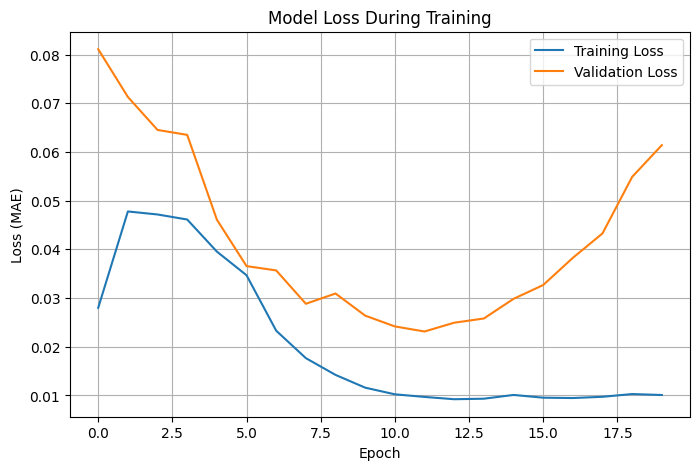

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True)
plt.show()


### Detect Anomalies in the S&P 500 Index Data (3 points)

* Predict the data and calculate the loss
* Define threshold and detect the anomalies

Discuss the Impact of COVID19 pandemic on stock prices in terms of anomalies detected during the pandemic period in stock prices

222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


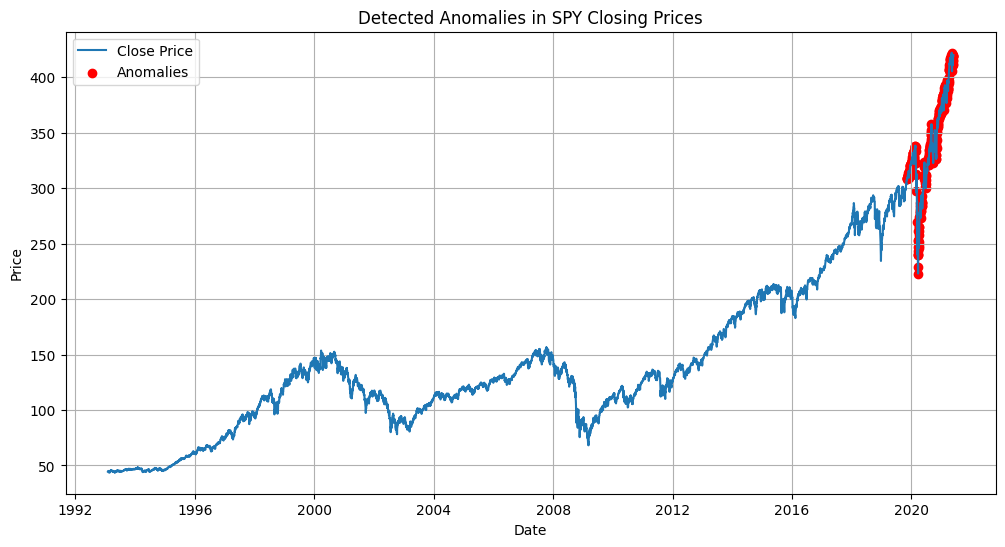

In [ ]:
# Predict using the trained autoencoder
X_pred = model.predict(X)

# Calculate reconstruction error (MAE)
reconstruction_errors = np.mean(np.abs(X_pred - X), axis=(1, 2))

# Define threshold for anomaly
threshold = np.percentile(reconstruction_errors, 95)  # top 5% as anomalies
anomalies = reconstruction_errors > threshold

# Map anomalies back to dates
anomaly_dates = spy_df.index[sequence_length:][anomalies]

# Plot anomalies on the price chart
plt.figure(figsize=(12, 6))
plt.plot(spy_df['Close'], label='Close Price')
plt.scatter(anomaly_dates, spy_df.loc[anomaly_dates]['Close'], color='red', label='Anomalies')
plt.title('Detected Anomalies in SPY Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


### Report Analysis

* Discuss on the results of T-SNE and PCA
* Dicuss about the results of LSTM autoencoder

# Report Analysis

#-> Results of T-SNE and PCA

### T-SNE (t-Distributed Stochastic Neighbor Embedding):
- A dimensionality reduction technique used for visualization.
- Applied to daily stock returns to visualize relationships between stocks in a lower-dimensional space.
- The resulting plot shows clusters of stocks with similar price movements or belonging to the same industry sector.
- Helps identify groups of stocks that behave similarly.

### PCA (Principal Component Analysis):
- Another dimensionality reduction technique that finds principal components capturing the most variance in the data.
- The explained variance ratio plot shows how much variance each principal component explains.
- We aimed to explain 95% of the variance in this project.
- Projecting data onto the first few principal components allows visualization while preserving most of the information.
- The PCA plot shows the distribution of stocks based on their principal component scores.

### Comparison:
- **T-SNE**: Focuses on preserving local neighborhood relationships, better for visualizing clusters and identifying similar stocks.
- **PCA**: Focuses on capturing global variance, useful for identifying main factors driving stock price movements.
- Both techniques are used for dimensionality reduction and visualization, but have different strengths and weaknesses.

#-> Results of LSTM Autoencoder

- The LSTM autoencoder was trained to reconstruct input time series data (S&P 500 index prices).
- It learns patterns in the data and predicts the next values in the sequence.
- Anomalies are detected by comparing predicted values with actual values.
- If the reconstruction error (difference between predicted and actual) is above a threshold, the data point is flagged as an anomaly.
- The model identified periods of significant price changes in the S&P 500 index, often corresponding to real-world events.
- By detecting anomalies, the model helps identify potential risks and opportunities in the market.

## Impact of COVID-19 Pandemic:

- The anomaly detection results show a clear impact of the COVID-19 pandemic on stock prices.
- The model identified a significant anomaly during the pandemic period (2020), indicating a large deviation from expected price behavior.
- This is consistent with the observed sharp market decline during the early stages of the pandemic.
- The LSTM autoencoder captured this significant event, highlighting its potential for detecting anomalies and monitoring market risks.
